<Figure size 800x500 with 0 Axes>

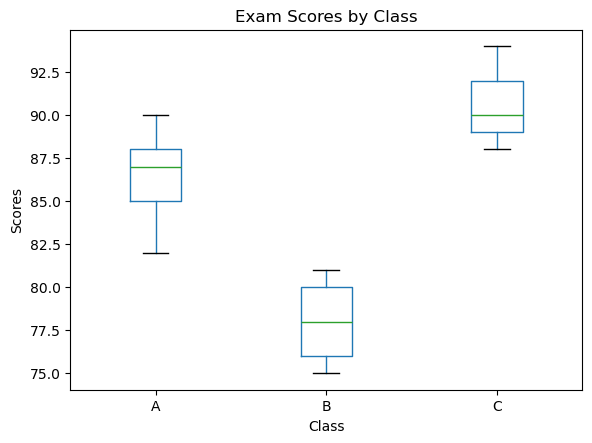

Null Hypothesis (H0): There is NO significant difference in mean exam scores among the classes
Alternative Hypothesis (H1): There IS a significant difference in mean exam scores among at least two classes

One-way ANOVA Results (scipy):
F-statistic: 28.5833
p-value: 0.0000


SyntaxError: invalid syntax (<unknown>, line 1)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Data
class_a = [85, 90, 88, 82, 87]
class_b = [76, 78, 80, 81, 75]
class_c = [92, 88, 94, 89, 90]

# Create DataFrame
data = pd.DataFrame({
    'scores': class_a + class_b + class_c,
    'class': ['A']*len(class_a) + ['B']*len(class_b) + ['C']*len(class_c)
})

# Boxplot visualization
plt.figure(figsize=(8, 5))
data.boxplot(column='scores', by='class', grid=False)
plt.title('Exam Scores by Class')
plt.suptitle('')
plt.xlabel('Class')
plt.ylabel('Scores')
plt.show()

# Hypotheses
print("Null Hypothesis (H0): There is NO significant difference in mean exam scores among the classes")
print("Alternative Hypothesis (H1): There IS a significant difference in mean exam scores among at least two classes\n")

# One-way ANOVA using scipy
f_value, p_value = stats.f_oneway(class_a, class_b, class_c)
print(f"One-way ANOVA Results (scipy):")
print(f"F-statistic: {f_value:.4f}")
print(f"p-value: {p_value:.4f}")

# One-way ANOVA using statsmodels (more detailed)
model = ols('scores ~ C(class)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nOne-way ANOVA Results (statsmodels):")
print(anova_table)

# Interpretation
alpha = 0.05
print("\nConclusion:")
if p_value < alpha:
    print(f"Reject the null hypothesis (p-value = {p_value:.4f} < {alpha}). There is significant evidence that at least two classes have different mean exam scores.")
else:
    print(f"Fail to reject the null hypothesis (p-value = {p_value:.4f} >= {alpha}). There is no significant evidence of difference in mean exam scores among classes.")

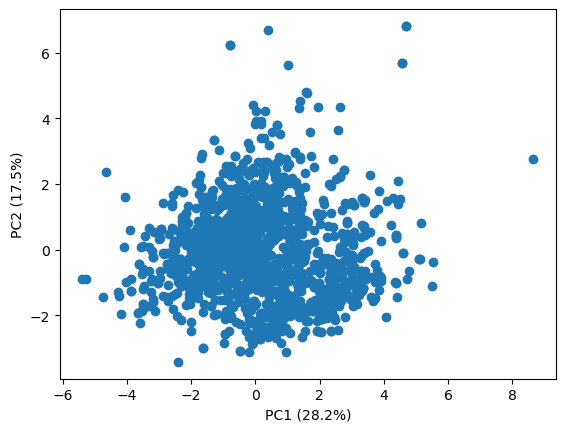

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Load and scale data
X = fetch_openml('wine-quality-red', version=1).data
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1 (%.1f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 (%.1f%%)' % (pca.explained_variance_ratio_[1]*100))
plt.show()